In [6]:
!pip install statsmodels yfinance numpy pandas matplotlib


[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python3 -m pip install --upgrade pip


In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

from statsmodels.tsa.seasonal import seasonal_decompose, STL

In [8]:
import yfinance as yf

In [9]:
msft = yf.Ticker("MSFT")

# get all stock info
msft.info

# get historical market data
hist = msft.history(period="1mo")

# show meta information about the history (requires history() to be called first)
msft.history_metadata

# show actions (dividends, splits, capital gains)
msft.actions
msft.dividends
msft.splits
msft.capital_gains  # only for mutual funds & etfs

# show share count
msft.get_shares_full(start="2022-01-01", end=None)

# show financials:
msft.calendar
msft.sec_filings
# - income statement
msft.income_stmt
msft.quarterly_income_stmt
# - balance sheet
msft.balance_sheet
msft.quarterly_balance_sheet
# - cash flow statement
msft.cashflow
msft.quarterly_cashflow
# see `Ticker.get_income_stmt()` for more options

# show holders
msft.major_holders
msft.institutional_holders
msft.mutualfund_holders
msft.insider_transactions
msft.insider_purchases
msft.insider_roster_holders

msft.sustainability

# show recommendations
msft.recommendations
msft.recommendations_summary
msft.upgrades_downgrades

# show analysts data
msft.analyst_price_targets
msft.earnings_estimate
msft.revenue_estimate
msft.earnings_history
msft.eps_trend
msft.eps_revisions
msft.growth_estimates

# Show future and historic earnings dates, returns at most next 4 quarters and last 8 quarters by default.
# Note: If more are needed use msft.get_earnings_dates(limit=XX) with increased limit argument.
msft.earnings_dates

# show ISIN code - *experimental*
# ISIN = International Securities Identification Number
msft.isin

# show options expirations
msft.options

# show news
msft.news

# # get option chain for specific expiration
# opt = msft.option_chain('2028-01-1')
# # data available via: opt.calls, opt.puts

[{'uuid': '35a27d6a-7c32-329f-b634-502e8e67e3ef',
  'title': 'Q3 2024 Gannett Co Inc Earnings Call',
  'publisher': 'Thomson Reuters StreetEvents',
  'link': 'https://finance.yahoo.com/news/q3-2024-gannett-co-inc-032411400.html',
  'providerPublishTime': 1730431451,
  'type': 'STORY',
  'relatedTickers': ['GCI', 'MSFT']},
 {'uuid': 'f64f92ee-04f5-36b3-934d-7483425d6bc1',
  'title': "Microsoft Stock Slides 5.6% In October Despite Another Quarter Of Double-Digit Growth; Why It's Not A Buy Now",
  'publisher': "Investor's Business Daily",
  'link': 'https://finance.yahoo.com/m/f64f92ee-04f5-36b3-934d-7483425d6bc1/microsoft-stock-slides-5.6%25.html',
  'providerPublishTime': 1730417407,
  'type': 'STORY',
  'thumbnail': {'resolutions': [{'url': 'https://s.yimg.com/uu/api/res/1.2/fFdr7sA_0z59s4QUuSDJiQ--~B/aD01NjM7dz0xMDAwO2FwcGlkPXl0YWNoeW9u/https://media.zenfs.com/en/ibd.com/73719136c2db3f3489f33f9770838b7a',
     'width': 1000,
     'height': 563,
     'tag': 'original'},
    {'url': 'ht

In [10]:
# Define the ticker symbol
ticker_symbol = "^NSEI"  # Nifty 50 index symbol
start_date = '2001-01-01'
# import datetime and 
import datetime
today = datetime.date.today()
min_start_date = today - datetime.timedelta(days=729)
# Fetch the data
data_daily = yf.download(tickers=ticker_symbol, start = start_date, interval='1d')
data_hourly = yf.download(tickers=ticker_symbol, start = min_start_date, interval='1h')
# Display the data
data_daily.head()

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


Price,Adj Close,Close,High,Low,Open,Volume
Ticker,^NSEI,^NSEI,^NSEI,^NSEI,^NSEI,^NSEI
Date,,,,,,
2007-09-17 00:00:00+00:00,4494.649902,4494.649902,4549.049805,4482.850098,4518.450195,0
2007-09-18 00:00:00+00:00,4546.200195,4546.200195,4551.799805,4481.549805,4494.100098,0
2007-09-19 00:00:00+00:00,4732.350098,4732.350098,4739.000000,4550.250000,4550.250000,0
2007-09-20 00:00:00+00:00,4747.549805,4747.549805,4760.850098,4721.149902,4734.850098,0
2007-09-21 00:00:00+00:00,4837.549805,4837.549805,4855.700195,4733.700195,4752.950195,0


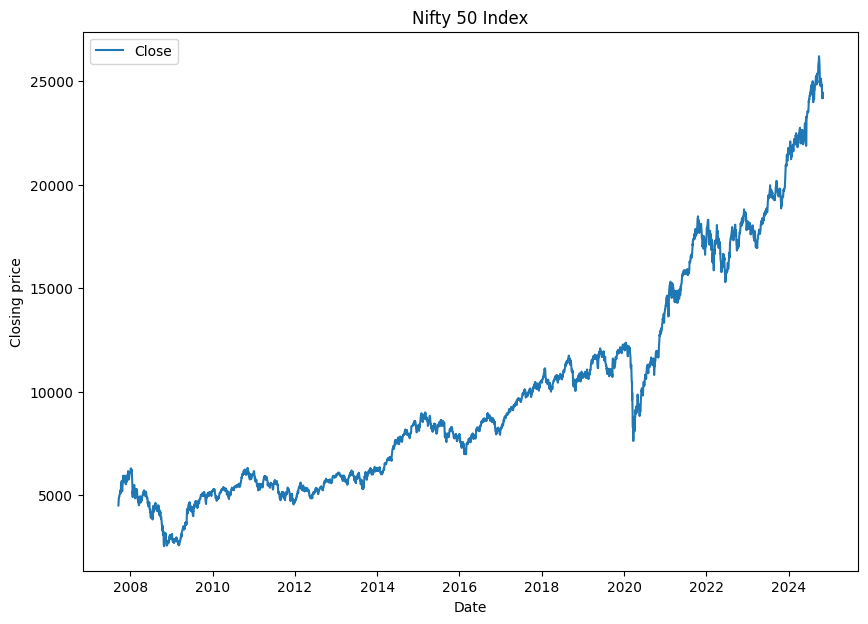

In [11]:
# Plot the data
plt.figure(figsize=(10, 7))
plt.plot(data_daily['Close'], label='Close')
plt.title('Nifty 50 Index')
plt.xlabel('Date')
plt.ylabel('Closing price')
plt.legend()
plt.show()


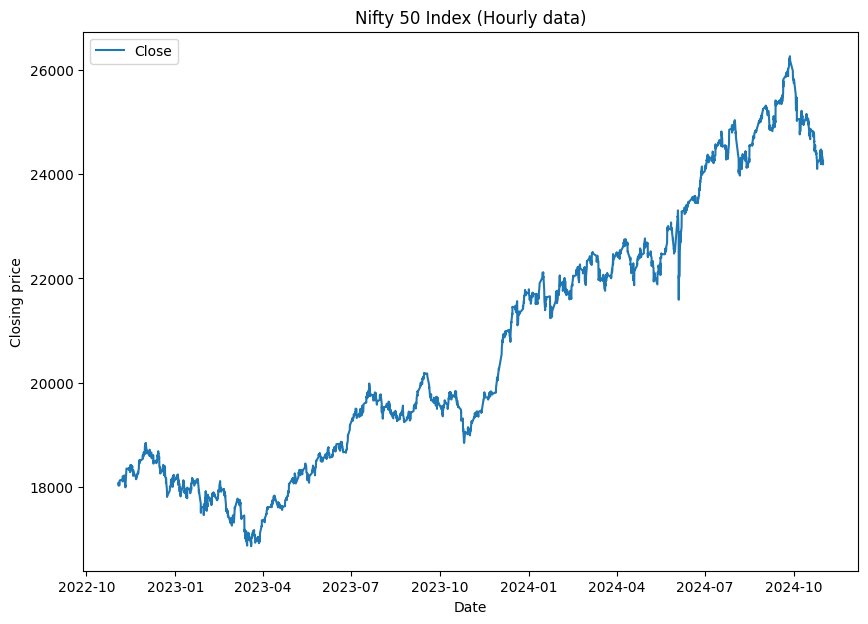

In [12]:
# plot the hourly data
def plot_stock_data(data, title):
    plt.figure(figsize=(10, 7))
    plt.plot(data['Close'], label='Close')
    plt.title(title)
    plt.xlabel('Date')
    plt.ylabel('Closing price')
    plt.legend()
    plt.show()
plot_stock_data(data_hourly, 'Nifty 50 Index (Hourly data)')

# Decompose the time series data


In [13]:
# get the shape of the data
data_daily.shape
# data_hourly.shape

(4198, 6)

In [14]:
df_hourly = data_hourly['Close'].dropna()

In [15]:
# df_hourly_hourly_hourly = pd.read_csv('')
df_hourly.head()

Ticker,^NSEI
Datetime,
2022-11-03 03:45:00+00:00,18081.300781
2022-11-03 04:45:00+00:00,18085.349609
2022-11-03 05:45:00+00:00,18040.949219
2022-11-03 06:45:00+00:00,18030.300781
2022-11-03 07:45:00+00:00,18027.199219


In [16]:
df_hourly['year'] = pd.DatetimeIndex(df_hourly.index).year
df_hourly

Ticker,^NSEI,year
Datetime,,
2022-11-03 03:45:00+00:00,18081.300781,2022
2022-11-03 04:45:00+00:00,18085.349609,2022
2022-11-03 05:45:00+00:00,18040.949219,2022
2022-11-03 06:45:00+00:00,18030.300781,2022
2022-11-03 07:45:00+00:00,18027.199219,2022
...,...,...
2024-10-31 05:45:00+00:00,24236.800781,2024
2024-10-31 06:45:00+00:00,24214.349609,2024
2024-10-31 07:45:00+00:00,24187.099609,2024


In [17]:
df_hourly['Close'] = df_hourly['^NSEI'].astype(float)

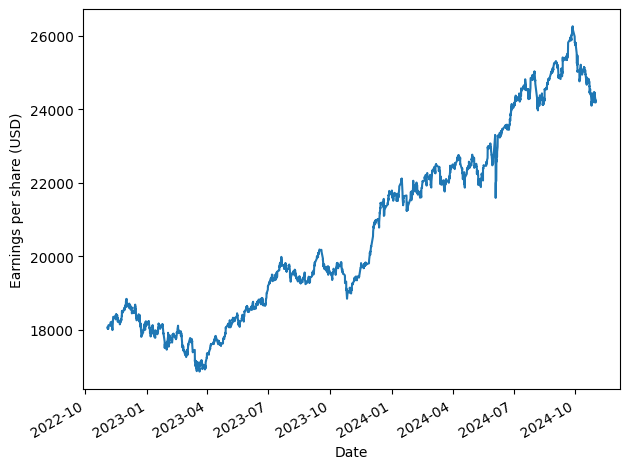

In [18]:
fig, ax = plt.subplots()

ax.plot(df_hourly.index, df_hourly.Close, label='Close')
ax.set_xlabel('Date')
ax.set_ylabel('Earnings per share (USD)')

# plt.xticks(np.arange(0, 85, 8), [1960, 1962, 1964, 1966, 1968, 1970, 1972, 1974, 1976, 1978, 1980])

fig.autofmt_xdate()
plt.tight_layout()

plt.savefig('figures/CH01_F01_peixeiro.png', dpi=300)

In [78]:
advanced_decomposition = STL(df_hourly.Close, period=5*7).fit()

In [43]:
# get date of the data
date = df_hourly.index[16]
# weekday
date.strftime('%A')
# month
date.strftime('%B')
# year
date.strftime('%Y')

#  weekday - monday, tuesday, wednesday, thursday, friday, saturday, sunday
# month - january, february, march, april, may, june, july, august, september, october, november, december
# year - 2022, 2023, 2024

# find the weekday of the data
df_hourly['weekday'] = pd.DatetimeIndex(df_hourly.index).weekday

In [56]:
# find the correlation between weekdays 
df_hourly.groupby('weekday').Close


In [ ]:
# correlation among weekdays
data_weekday_0 = df_hourly[df_hourly['weekday'] == 0].Close
data_weekday_1 = df_hourly[df_hourly['weekday'] == 1].Close
data_weekday_2 = df_hourly[df_hourly['weekday'] == 2].Close
data_weekday_3 = df_hourly[df_hourly['weekday'] == 3].Close
data_weekday_4 = df_hourly[df_hourly['weekday'] == 4].Close

# correlation matrix
import seaborn as sns
df_weekly = pd.DataFrame({'Monday': data_weekday_0, 'Tuesday': data_weekday_1, 'Wednesday': data_weekday_2, 'Thursday': data_weekday_3, 'Friday': data_weekday_4})



,Monday,Tuesday,Wednesday,Thursday,Friday
Monday,1.0,NaN,NaN,NaN,NaN
Tuesday,NaN,1.0,NaN,NaN,NaN
Wednesday,NaN,NaN,1.0,NaN,NaN
Thursday,NaN,NaN,NaN,1.0,NaN
Friday,NaN,NaN,NaN,NaN,1.0


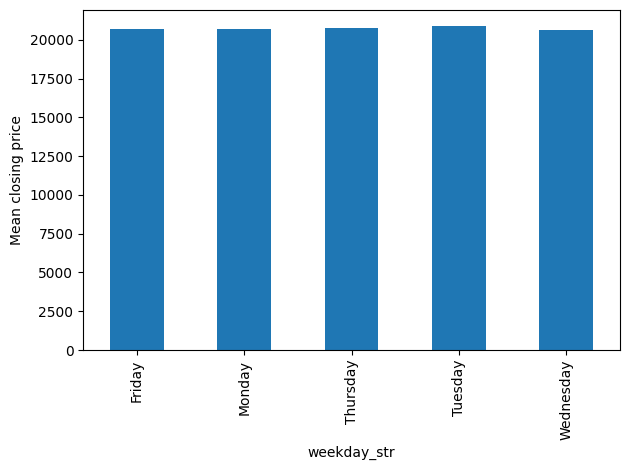

In [ ]:
# find the correlation between the each of the weekdays wrt the closing price
df_hourly.groupby('weekday_str')['Close'].corr(df_hourly['Close'])

# plot the data
fig, ax = plt.subplots()    
df_hourly.groupby('weekday_str')['Close'].mean().plot(kind='bar', ax=ax)
ax.set_ylabel('Mean closing price')
plt.tight_layout()



In [67]:
df_hourly.head(20)

Ticker,^NSEI,year,Close,weekday,weekday_str
Datetime,,,,,
2022-11-03 03:45:00+00:00,18081.300781,2022,18081.300781,3,Thursday
2022-11-03 04:45:00+00:00,18085.349609,2022,18085.349609,3,Thursday
2022-11-03 05:45:00+00:00,18040.949219,2022,18040.949219,3,Thursday
2022-11-03 06:45:00+00:00,18030.300781,2022,18030.300781,3,Thursday
2022-11-03 07:45:00+00:00,18027.199219,2022,18027.199219,3,Thursday
2022-11-03 08:45:00+00:00,18050.400391,2022,18050.400391,3,Thursday
2022-11-03 09:45:00+00:00,18048.050781,2022,18048.050781,3,Thursday
2022-11-04 03:45:00+00:00,18034.000000,2022,18034.000000,4,Friday
2022-11-04 04:45:00+00:00,18038.099609,2022,18038.099609,4,Friday


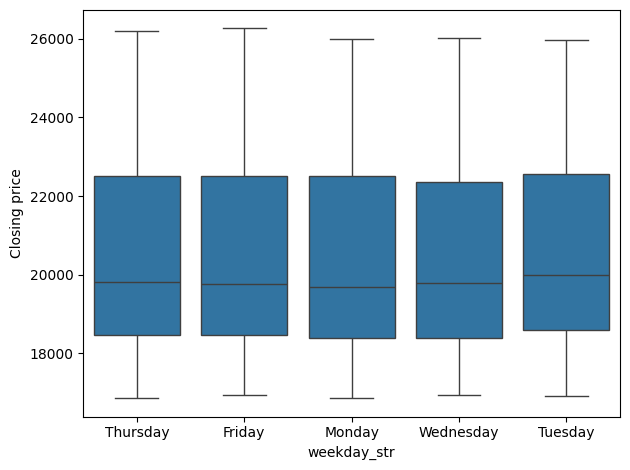

In [68]:
# boxplot
fig, ax = plt.subplots()
sns.boxplot(x='weekday_str', y='Close', data=df_hourly, ax=ax)
ax.set_ylabel('Closing price')
plt.tight_layout()


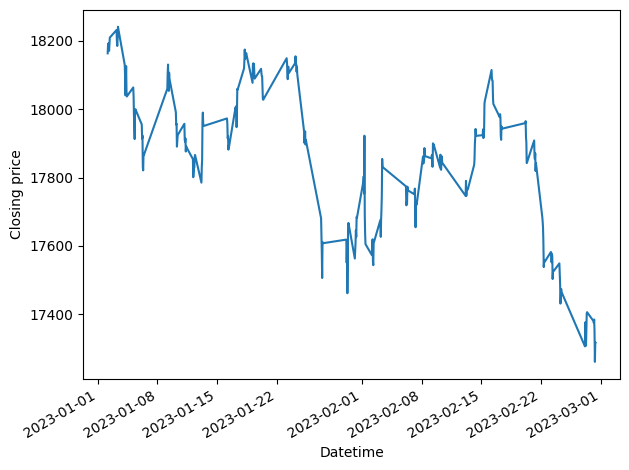

In [72]:
# plot the data for 2 weeks
fig, ax = plt.subplots()
df_hourly['2023-01-01':'2023-02-28'].Close.plot(ax=ax)
ax.set_ylabel('Closing price')
plt.tight_layout()
plt.show()


In [76]:
result = seasonal_decompose(df_hourly.drop(columns= "weekday_str"), model='additive', period=5)

TypeError: Index(...) must be called with a collection of some kind, 'seasonal' was passed

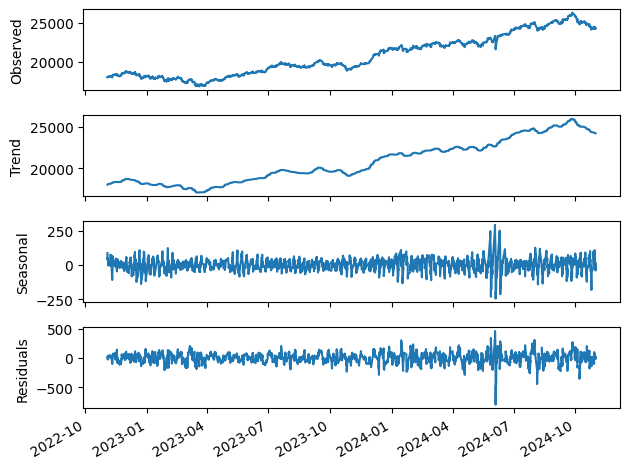

In [79]:
fig, (ax1, ax2, ax3, ax4) = plt.subplots(nrows=4, ncols=1, sharex=True)

ax1.plot(advanced_decomposition.observed)
ax1.set_ylabel('Observed')

ax2.plot(advanced_decomposition.trend)
ax2.set_ylabel('Trend')

ax3.plot(advanced_decomposition.seasonal)
ax3.set_ylabel('Seasonal')

ax4.plot(advanced_decomposition.resid)
ax4.set_ylabel('Residuals')


# plt.xticks(np.arange(0, 85, 8), [1960, 1962, 1964, 1966, 1968, 1970, 1972, 1974, 1976, 1978, 1980])

fig.autofmt_xdate()
plt.tight_layout()

plt.savefig('figures/CH01_F02_peixeiro.png', dpi=300)

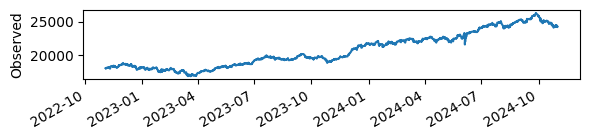

In [80]:
fig, ax = plt.subplots(figsize=(6, 1.5))

ax.plot(advanced_decomposition.observed)
ax.set_ylabel('Observed')
# plt.xticks(np.arange(0, 85, 8), [1960, 1962, 1964, 1966, 1968, 1970, 1972, 1974, 1976, 1978, 1980])

fig.autofmt_xdate()
plt.tight_layout()

plt.savefig('figures/CH01_F03_peixeiro.png', dpi=300)

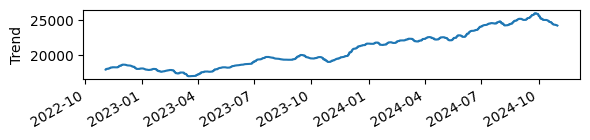

In [81]:
fig, ax = plt.subplots(figsize=(6, 1.5))

ax.plot(advanced_decomposition.trend)
ax.set_ylabel('Trend')
# plt.xticks(np.arange(0, 85, 8), [1960, 1962, 1964, 1966, 1968, 1970, 1972, 1974, 1976, 1978, 1980])

fig.autofmt_xdate()
plt.tight_layout()

plt.savefig('figures/CH01_F04_peixeiro.png', dpi=300)

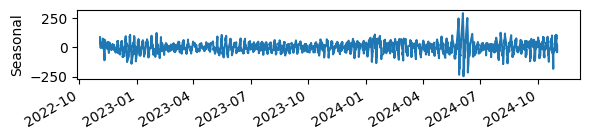

In [82]:
fig, ax = plt.subplots(figsize=(6, 1.5))

ax.plot(advanced_decomposition.seasonal)
ax.set_ylabel('Seasonal')
# plt.xticks(np.arange(0, 85, 8), [1960, 1962, 1964, 1966, 1968, 1970, 1972, 1974, 1976, 1978, 1980])

fig.autofmt_xdate()
plt.tight_layout()

plt.savefig('figures/CH01_F05_peixeiro.png', dpi=300)

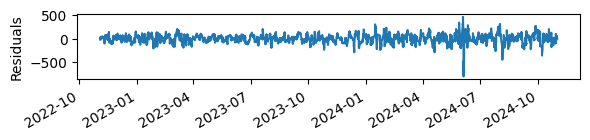

In [83]:
fig, ax = plt.subplots(figsize=(6, 1.5))

ax.plot(advanced_decomposition.resid)
ax.set_ylabel('Residuals')
# plt.xticks(np.arange(0, 85, 8), [1960, 1962, 1964, 1966, 1968, 1970, 1972, 1974, 1976, 1978, 1980])

fig.autofmt_xdate()
plt.tight_layout()

plt.savefig('figures/CH01_F06_peixeiro.png', dpi=300)

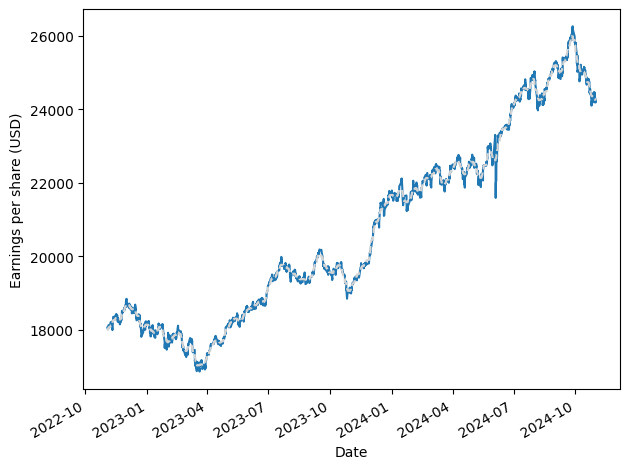

In [84]:
fig, ax = plt.subplots()

ax.plot(df_hourly.index, df_hourly.Close, label='Close')
ax.plot(advanced_decomposition.trend, color='lightgrey', linestyle='--', label='Trend')
ax.set_xlabel('Date')
ax.set_ylabel('Earnings per share (USD)')

# plt.xticks(np.arange(0, 85, 8), [1960, 1962, 1964, 1966, 1968, 1970, 1972, 1974, 1976, 1978, 1980])

fig.autofmt_xdate()
plt.tight_layout()

plt.savefig('figures/CH01_F01_peixeiro.png', dpi=300)

In [87]:
df_n = df_hourly[['^NSEI', 'Close']]

In [88]:
# sesional decomposition - 
# - trend
# - seasonal
# - residual

from statsmodels.tsa.seasonal import seasonal_decompose

result = seasonal_decompose(df_n, model='additive', period=5)

TypeError: Index(...) must be called with a collection of some kind, 'seasonal' was passed

In [91]:
df_n

Ticker,^NSEI,Close
Datetime,,
2022-11-03 03:45:00+00:00,18081.300781,18081.300781
2022-11-03 04:45:00+00:00,18085.349609,18085.349609
2022-11-03 05:45:00+00:00,18040.949219,18040.949219
2022-11-03 06:45:00+00:00,18030.300781,18030.300781
2022-11-03 07:45:00+00:00,18027.199219,18027.199219
...,...,...
2024-10-31 05:45:00+00:00,24236.800781,24236.800781
2024-10-31 06:45:00+00:00,24214.349609,24214.349609
2024-10-31 07:45:00+00:00,24187.099609,24187.099609


In [94]:
df_daily = data_daily['Close']

In [95]:
df_daily.head()

Ticker,^NSEI
Date,
2007-09-17 00:00:00+00:00,4494.649902
2007-09-18 00:00:00+00:00,4546.200195
2007-09-19 00:00:00+00:00,4732.350098
2007-09-20 00:00:00+00:00,4747.549805
2007-09-21 00:00:00+00:00,4837.549805


In [97]:
# save the data
# makedir
import os
os.makedirs('data', exist_ok=True)
df_daily.to_csv('data/nifty_50_index_daily.csv')

<Figure size 1000x500 with 0 Axes>

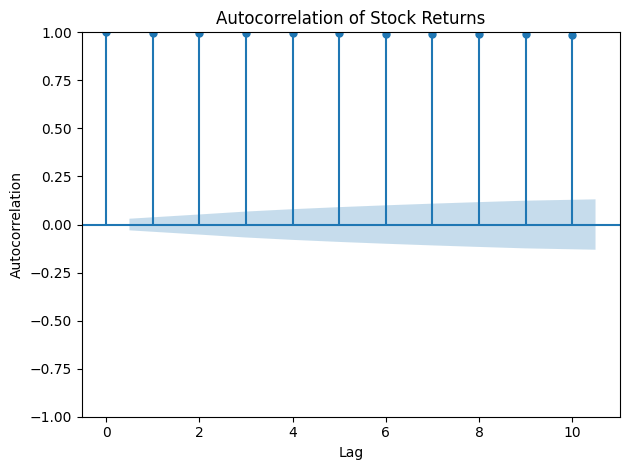

In [99]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf

df_d = pd.read_csv('data/nifty_50_index_daily.csv', index_col=0, parse_dates=True)

# Plot autocorrelation
plt.figure(figsize=(10, 5))
plot_acf(df_d.Close, lags=10)
plt.title('Autocorrelation of Stock Returns')
plt.xlabel('Lag')
plt.ylabel('Autocorrelation')
plt.tight_layout()
plt.show()